# Relationship Between Household Electricity Consumption and Weather
### Data Visualization Final Project 
### Nov 27th 2020 Muse Wu

=======================================================================================================================

### Introduction

#### Index:
    
    Time -  Time of the readings, with a time span of 1 minute.
    
#### Energy Usage:
    
    use[kW] - Total energy consumption
    gen[kW] - Total energy generated by means of solar or other power generation resources
    House overall [kW] - overall house energy consumption
    Dishwasher [kW] - energy consumed by specific appliance
    Furnace 1 [kW] - energy consumed by specific appliance
    Furnace 2 [kW] - energy consumed by specific appliance
    Home office [kW] - energy consumed by specific appliance
    Fridge [kW] - energy consumed by specific appliance
    Wine cellar [kW] - energy consumed by specific appliance
    Garage door [kW] - energy consumed by specific appliance
    Kitchen 12 [kW] - energy consumption in kitchen 1
    Kitchen 14 [kW] - energy consumption in kitchen 2
    Kitchen 38 [kW] - energy consumption in kitchen 3
    Barn [kW] - energy consumed by specific appliance
    Well [kW] - energy consumed by specific appliance
    Microwave [kW] - energy consumed by specific appliance
    Living room [kW] - energy consumption in Living room
    Solar [kW] - Solar power generation

#### Weather:
    
    temperature - a physical quantity expressing hot and cold
    humidity: - the concentration of water vapour present in air
    visibility - length of a beam of light travels before its luminous flux is reduced to 5% of its original value
    apparentTemperature - temperature equivalent perceived by humans, which applied to the perceived outdoor temperature
    pressure - Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather

#### Other:
    
    Summary - Report generated by the by the data collection system
              'Clear' 'Mostly Cloudy' 'Overcast' 'Partly Cloudy' 'Drizzle' 'Light Rain' 'Rain' 'Light Snow'
              'Flurries' 'Breezy' 'Snow' 'Rain and Breezy' 'Foggy' 'Breezy and Mostly Cloudy' 'Breezy and Partly Cloudy' 
              'Flurries and Breezy' 'Dry' 'Heavy Snow'
    Icon - The icon that is used by the data collection system

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [2]:
# Read Data
data = pd.read_csv(r'C:\Users\82124\OneDrive\JHU\2020Fall_Data Visualization\Final\Final_Data_Home.csv')
# data.info()

C:\Users\82124\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Processing

Summary
 ['Clear' 'Mostly Cloudy' 'Overcast' 'Partly Cloudy' 'Drizzle' 'Light Rain'
 'Rain' 'Light Snow' 'Flurries' 'Breezy' 'Snow' 'Rain and Breezy' 'Foggy'
 'Breezy and Mostly Cloudy' 'Breezy and Partly Cloudy'
 'Flurries and Breezy' 'Dry' 'Heavy Snow' nan]
Icon
 ['clear-night' 'partly-cloudy-night' 'clear-day' 'cloudy'
 'partly-cloudy-day' 'rain' 'snow' 'wind' 'fog' nan]


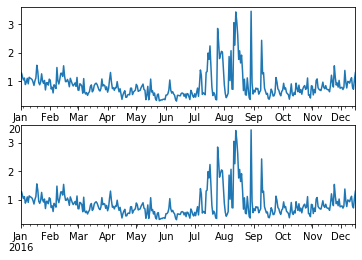

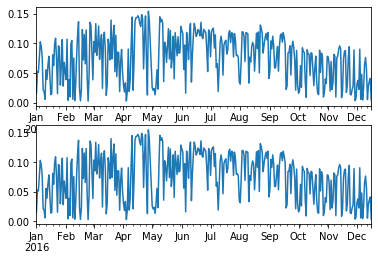

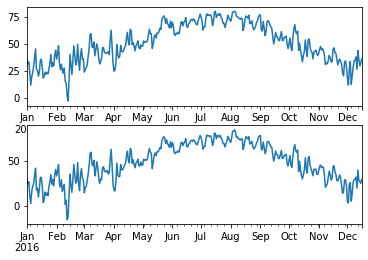

In [3]:
# Convert time index
time_index = pd.date_range('2016-01-01 05:00', periods=503911,  freq='min')  
time_index = pd.DatetimeIndex(time_index)
data = data.set_index(time_index)

# Change column name
data.columns = [col.replace(' [kW]', '') for col in data.columns]

# Combine similar information
data['sum_Furnace'] = data[['Furnace 1','Furnace 2']].sum(axis=1)
data['avg_Kitchen'] = data[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)
data = data.drop(['Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)
data = data.drop(['Furnace 1','Furnace 2'], axis=1)

# Drop duplicated data
fig, axes = plt.subplots(nrows=2, ncols=1)
data['use'].resample('D').mean().plot(ax=axes[0])
data['House overall'].resample('D').mean().plot(ax=axes[1])
fig, axes = plt.subplots(nrows=2, ncols=1)
data['gen'].resample('D').mean().plot(ax=axes[0])
data['Solar'].resample('D').mean().plot(ax=axes[1])
fig, axes = plt.subplots(nrows=2, ncols=1)
data['temperature'].resample('D').mean().plot(ax=axes[0])
data['apparentTemperature'].resample('D').mean().plot(ax=axes[1])
print(f'Summary\n {data.summary.unique()}')
print(f'Icon\n {data.icon.unique()}')
data = data.drop(columns=['House overall', 'icon', 'Solar', 'apparentTemperature'])

# Replace missing information
data['cloudCover'].value_counts()
data['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
data['cloudCover'] = data['cloudCover'].astype('float')

#data.info()

In [4]:
# data in category
data_use_gen = data[['use', 'gen']]
data_Energy = data[['Dishwasher', 'Home office', 'Fridge', 'Wine cellar','Garage door',
                   'Barn', 'Well', 'Microwave', 'Living room','sum_Furnace', 'avg_Kitchen']]
data_Weather = data[['temperature', 'humidity', 'visibility', 'pressure', 'windSpeed',
                    'cloudCover', 'windBearing', 'precipIntensity','dewPoint', 'precipProbability']]

### How does electrical appliances’ usage change over time?

In [5]:
# Line Graph
data_Energy_day = data_Energy.resample('D').mean()
fig = go.FigureWidget()
for col in data_Energy_day.columns:
    fig.add_trace(go.Scatter(x=data_Energy_day.index, y=data_Energy_day[col], name=col))
fig.update_layout(
    title="Household Electricity Consumption",
    xaxis_title="Month",
    yaxis_title="Electricity Usage [kW]",
    legend_title="Type of Activities",
    font=dict(family="Courier New, monospace",size=15,color="Black"))
fig.show()

In [6]:
# Aggregate data in the time of the day
data_hour = pd.DataFrame()
for col in data_Energy.columns:
    column = data_Energy.groupby(data_Energy.index.strftime('%H:%M'))[col].mean()
    data_hour[col] = column

# Line Graph
fig = go.FigureWidget()
for col in data_hour.columns:
    fig.add_trace(go.Scatter(x=data_hour.index, y=data_hour[col], name=col))
fig.update_layout(
    title="Electricity Consumption in a Day",
    xaxis_title="Time",
    yaxis_title="Electricity Consumption [kW]",
    legend_title="Type of Activities",
    font=dict(family="Courier New, monospace",size=15,color="Black"))
fig.show()

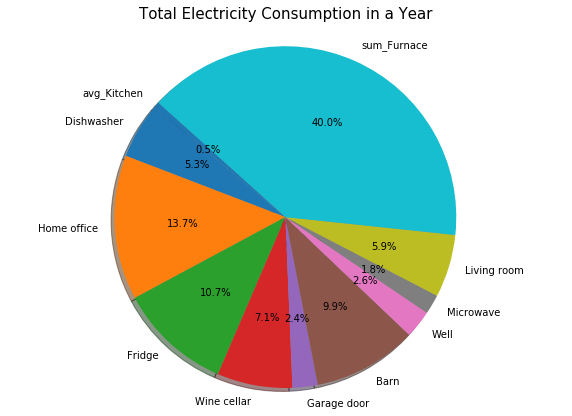

In [7]:
# Pie Chart
data_sum = data_Energy_day.sum()
plt.figure(figsize =(10, 7)) 
plt.pie(data_sum, labels=data_sum.index,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Total Electricity Consumption in a Year', fontsize = 15)
plt.axis('equal')
plt.show()

### How Do Total Electricity Consumption and Total Solar Power Change Over Time?

In [8]:
# Line Graph
data_use_gen_day = data_use_gen.resample('D').mean()
fig = go.FigureWidget()
for col in data_use_gen_day.columns:
    fig.add_trace(go.Scatter(x=data_use_gen_day.index, y=data_use_gen_day[col], name=col))
fig.update_layout(
    title="Electricity Consumption VS Total Solar Power",
    xaxis_title="Month",
    yaxis_title="Electricity [kW]",
    legend_title="Type of Activities",
    font=dict(family="Courier New, monospace",size=15,color="Black"))
fig.show()

In [9]:
# Aggregate data in the time of the day
data_hour = pd.DataFrame()
for col in data_use_gen.columns:
    column = data_use_gen.groupby(data_use_gen.index.strftime('%H:%M'))[col].mean()
    data_hour[col] = column

# Line Graph
fig = go.FigureWidget()
for col in data_hour.columns:
    fig.add_trace(go.Scatter(x=data_hour.index, y=data_hour[col], name=col))
fig.update_layout(
    title="Electricity Consumption and Total Solar Power in a Day",
    xaxis_title="Time",
    yaxis_title="Electricity [kW]",
    legend_title="Type of Activities",
    font=dict(family="Courier New, monospace",size=15,color="Black"))
fig.show()

### How Does Weather Change Over Time?

In [10]:
# Line Graph
data_Weather_day = data_Weather.resample('D').mean()
fig = go.FigureWidget()
for col in data_Weather_day.columns:
    fig.add_trace(go.Scatter(x=data_Weather_day.index, y=data_Weather_day[col], name=col))
fig.update_layout(
    title="Weather Factors Over Year",
    xaxis_title="Month",
    legend_title="Type of Measurement",
    font=dict(family="Courier New, monospace",size=13,color="Black"))
fig.show()

### How Does Weather Change Affect Electricity Consumption?

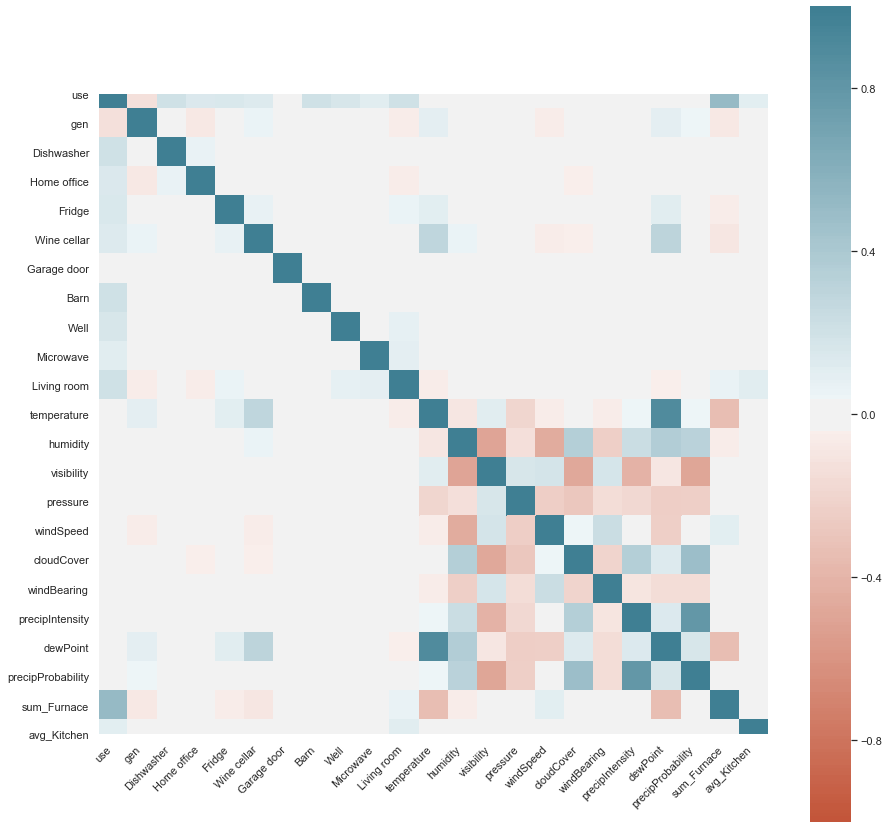

In [15]:
# Heatmap
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.set(rc={'figure.figsize':(20,20)})

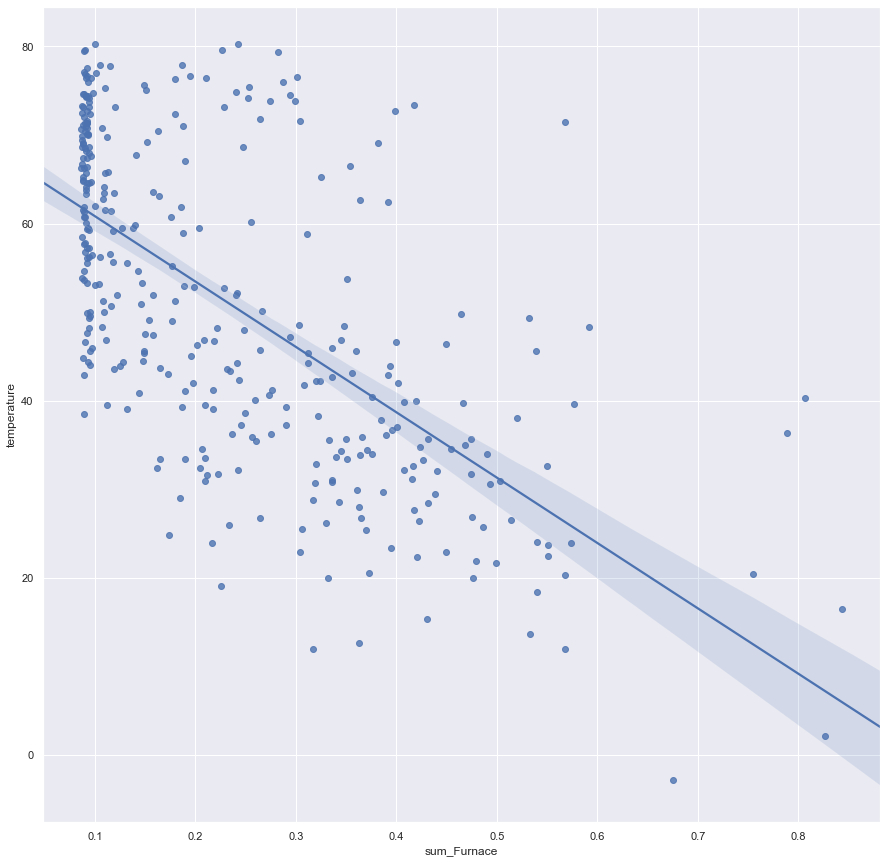

In [13]:
# Linear Regression Graph "Furnace VS Temperature"
sns.regplot(x=data_Energy_day["sum_Furnace"], y= data_Weather_day["temperature"])

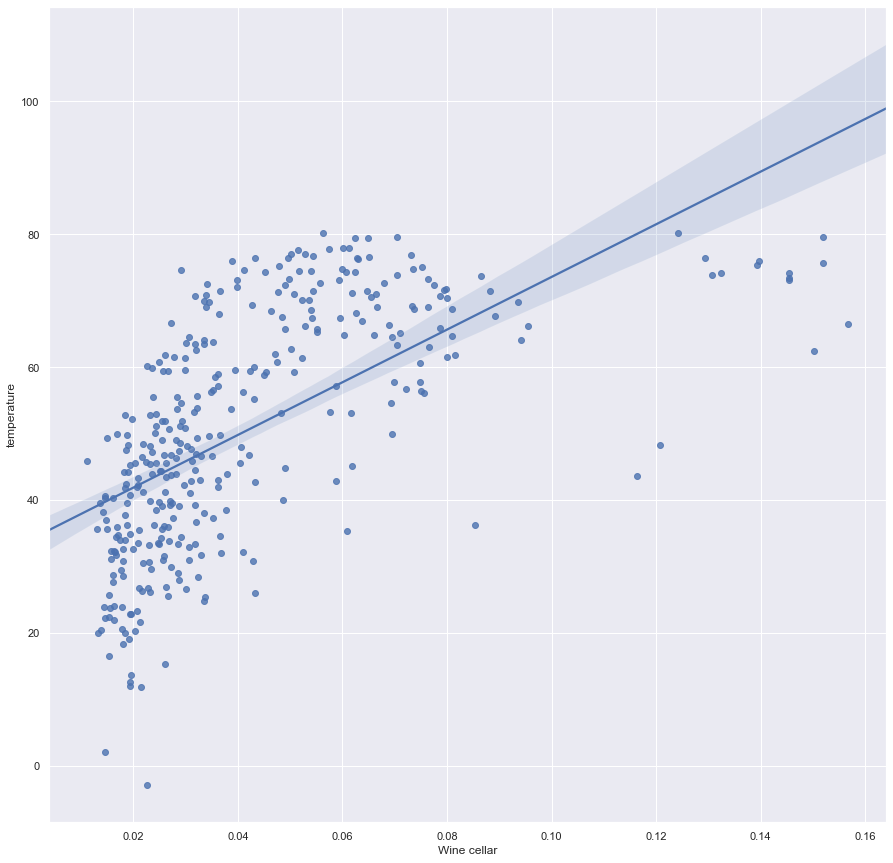

In [14]:
# Linear Regression Graph "Wine Cellar VS Temperature"
sns.regplot(x=data_Energy_day['Wine cellar'], y= data_Weather_day["temperature"])

#### Reference

#### Data Source: 
    
    https://www.kaggle.com/taranvee/smart-home-dataset-with-weather-information
    
#### Source Code:
    https://www.kaggle.com/malekzadeh/smart-home-data-processing-weather-vs-energy
    https://www.kaggle.com/salahuddinemr/smart-home-data-visualization
    https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec